# Importing Required Modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1- Importing Datasets

#### Loading Sales Dataset

In [2]:
Sales_15=pd.read_csv("AdventureWorks_Sales_2015.csv")
Sales_16=pd.read_csv("AdventureWorks_Sales_2016.csv")
Sales_17=pd.read_csv("AdventureWorks_Sales_2017.csv")

#### Loading customers data

In [3]:
customers_df=pd.read_csv("AdventureWorks_Customers.csv", encoding='latin-1')
customers_df.head()

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y


#### Loading Territory data

In [4]:
Territory_df=pd.read_csv("AdventureWorks_Territories.csv")
Territory_df.head()

,TerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


# 2-Data Preperation

### Concatinating 3 years sales data

In [5]:
Sales_df = pd.concat([Sales_15, Sales_16, Sales_17], ignore_index=True)
Sales_df

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1
1,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1
2,1/1/2015,10/29/2001,SO45082,350,11455,9,1,1
3,1/1/2015,11/16/2001,SO45081,338,26782,6,1,1
4,1/2/2015,12/15/2001,SO45083,312,14947,10,1,1
...,...,...,...,...,...,...,...,...
56041,6/30/2017,3/22/2004,SO74143,477,28517,10,3,2
56042,6/30/2017,3/15/2004,SO74143,479,28517,10,2,1
56043,6/30/2017,4/8/2004,SO74143,606,28517,10,1,1
56044,6/30/2017,5/15/2004,SO74124,480,21676,7,2,2


#### Merging sales and customers data

In [6]:
merged_df = pd.merge(Sales_df, customers_df, on='CustomerKey')
merged_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
1,1/9/2017,11/22/2003,SO61768,485,14657,1,2,2,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
2,1/9/2017,12/20/2003,SO61768,215,14657,1,3,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
3,1/9/2017,10/1/2003,SO61768,352,14657,1,1,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N
4,1/1/2015,12/5/2001,SO45079,312,29255,4,1,1,MR.,KYLE,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000",3,Partial College,Professional,N


### Merging merged dataframe and territory data

In [7]:
merged_df = pd.merge(merged_df, Territory_df, on='TerritoryKey')
merged_df

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent
0,1/1/2015,9/21/2001,SO45080,332,14657,1,1,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,Northwest,United States,North America
1,1/9/2017,11/22/2003,SO61768,485,14657,1,2,2,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,Northwest,United States,North America
2,1/9/2017,12/20/2003,SO61768,215,14657,1,3,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,Northwest,United States,North America
3,1/9/2017,10/1/2003,SO61768,352,14657,1,1,1,MR.,JOHN,THOMAS,11/11/1958,M,M,john48@adventure-works.com,"$80,000",1,Partial College,Skilled Manual,N,Northwest,United States,North America
4,1/4/2015,9/15/2001,SO45098,310,29167,1,1,1,MRS.,DAWN,SHEN,3/12/1959,S,F,dawn26@adventure-works.com,"$80,000",2,Graduate Degree,Professional,N,Northwest,United States,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56041,5/15/2017,4/17/2004,SO70618,528,22124,3,2,1,MRS.,DESIREE,ALONSO,9/5/1937,M,F,desiree4@adventure-works.com,"$60,000",3,Graduate Degree,Management,Y,Central,United States,North America
56042,5/31/2017,4/3/2004,SO71714,462,27657,3,4,2,MR.,FREDERICK,CHANDRA,10/16/1936,M,M,frederick1@adventure-works.com,"$50,000",2,Graduate Degree,Management,N,Central,United States,North America
56043,5/31/2017,3/29/2004,SO71714,220,27657,3,3,1,MR.,FREDERICK,CHANDRA,10/16/1936,M,M,frederick1@adventure-works.com,"$50,000",2,Graduate Degree,Management,N,Central,United States,North America
56044,5/31/2017,2/26/2004,SO71714,529,27657,3,1,1,MR.,FREDERICK,CHANDRA,10/16/1936,M,M,frederick1@adventure-works.com,"$50,000",2,Graduate Degree,Management,N,Central,United States,North America


##### Sorting dataframe based on CustomerKey and reindexing it

In [8]:
df = merged_df.sort_values(by='CustomerKey', ascending=False)
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent
46652,3/13/2016,12/23/2002,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,12/8/1959,M,M,jésus9@adventure-works.com,"$30,000",0,Bachelors,Clerical,Y,France,France,Europe
46716,3/22/2016,12/10/2002,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,3/5/1959,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y,France,France,Europe
50716,2/13/2015,11/15/2001,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1/5/1960,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N,Germany,Germany,Europe
43784,1/18/2017,11/11/2003,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe
43788,1/18/2017,11/25/2003,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe


In [9]:
df = df.reset_index(drop=True)
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent
0,3/13/2016,12/23/2002,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,12/8/1959,M,M,jésus9@adventure-works.com,"$30,000",0,Bachelors,Clerical,Y,France,France,Europe
1,3/22/2016,12/10/2002,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,3/5/1959,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y,France,France,Europe
2,2/13/2015,11/15/2001,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1/5/1960,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N,Germany,Germany,Europe
3,1/18/2017,11/11/2003,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe
4,1/18/2017,11/25/2003,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe


#### Checking for nulls in the dataset

Nulls in the dataset

In [10]:
df.isna().sum()

OrderDate           0
StockDate           0
OrderNumber         0
ProductKey          0
CustomerKey         0
TerritoryKey        0
OrderLineItem       0
OrderQuantity       0
Prefix            380
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            380
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
Region              0
Country             0
Continent           0
dtype: int64

Gender and Prefix column has nulls in it. Since we have very few rows in the dataset that have nulls in them. We can easily remove them

In [11]:
df.dropna(inplace=True)
df.isna().sum()

OrderDate         0
StockDate         0
OrderNumber       0
ProductKey        0
CustomerKey       0
TerritoryKey      0
OrderLineItem     0
OrderQuantity     0
Prefix            0
FirstName         0
LastName          0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
Region            0
Country           0
Continent         0
dtype: int64

Dropping Duplicates

In [12]:
df = df.drop_duplicates()

#### Fixing columns in the Dataset and adding new

In [13]:
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent
0,3/13/2016,12/23/2002,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,12/8/1959,M,M,jésus9@adventure-works.com,"$30,000",0,Bachelors,Clerical,Y,France,France,Europe
1,3/22/2016,12/10/2002,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,3/5/1959,M,M,clayton0@adventure-works.com,"$30,000",3,Bachelors,Clerical,Y,France,France,Europe
2,2/13/2015,11/15/2001,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1/5/1960,S,M,ivan0@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,N,Germany,Germany,Europe
3,1/18/2017,11/11/2003,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe
4,1/18/2017,11/25/2003,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,11/10/1960,S,F,nina21@adventure-works.com,"$30,000",3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe


#### Converting datacolumns in datatype

In [14]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['StockDate'] = pd.to_datetime(df['StockDate'])
df['BirthDate'] = pd.to_datetime(df['BirthDate'])

#### Removing dollar sign from Annual income and converting it to numerical format

In [15]:
df['AnnualIncome'] = df['AnnualIncome'].str.replace(r'\D', '', regex=True).astype(int)
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent
0,2016-03-13,2002-12-23,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,1959-12-08,M,M,jésus9@adventure-works.com,30000,0,Bachelors,Clerical,Y,France,France,Europe
1,2016-03-22,2002-12-10,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,1959-03-05,M,M,clayton0@adventure-works.com,30000,3,Bachelors,Clerical,Y,France,France,Europe
2,2015-02-13,2001-11-15,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1960-01-05,S,M,ivan0@adventure-works.com,30000,3,Graduate Degree,Clerical,N,Germany,Germany,Europe
3,2017-01-18,2003-11-11,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,1960-11-10,S,F,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe
4,2017-01-18,2003-11-25,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,1960-11-10,S,F,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe


#### Adding age column to Pandas dataframe

In [16]:
from datetime import datetime
current_date = datetime.now()
df['CustomerAge'] = (current_date - df['BirthDate']).astype('<m8[Y]')
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent,CustomerAge
0,2016-03-13,2002-12-23,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,1959-12-08,M,M,jésus9@adventure-works.com,30000,0,Bachelors,Clerical,Y,France,France,Europe,63.0
1,2016-03-22,2002-12-10,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,1959-03-05,M,M,clayton0@adventure-works.com,30000,3,Bachelors,Clerical,Y,France,France,Europe,64.0
2,2015-02-13,2001-11-15,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1960-01-05,S,M,ivan0@adventure-works.com,30000,3,Graduate Degree,Clerical,N,Germany,Germany,Europe,63.0
3,2017-01-18,2003-11-11,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,1960-11-10,S,F,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe,62.0
4,2017-01-18,2003-11-25,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,1960-11-10,S,F,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe,62.0


#### Creating Fullname column

In [17]:
df['Full Name'] = df['FirstName'] + ' ' + df['LastName']

# 4-Analysis

##### Basic overview of Dataset

In [18]:
df.shape

(55666, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55666 entries, 0 to 56045
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderDate       55666 non-null  datetime64[ns]
 1   StockDate       55666 non-null  datetime64[ns]
 2   OrderNumber     55666 non-null  object        
 3   ProductKey      55666 non-null  int64         
 4   CustomerKey     55666 non-null  int64         
 5   TerritoryKey    55666 non-null  int64         
 6   OrderLineItem   55666 non-null  int64         
 7   OrderQuantity   55666 non-null  int64         
 8   Prefix          55666 non-null  object        
 9   FirstName       55666 non-null  object        
 10  LastName        55666 non-null  object        
 11  BirthDate       55666 non-null  datetime64[ns]
 12  MaritalStatus   55666 non-null  object        
 13  Gender          55666 non-null  object        
 14  EmailAddress    55666 non-null  object        
 15  An

In [20]:
df.describe()

,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,AnnualIncome,TotalChildren,CustomerAge
count,55666.000000,55666.000000,55666.000000,55666.000000,55666.000000,55666.000000,55666.000000,55666.000000
mean,438.917274,18843.083929,6.250835,1.903083,1.501545,59789.817842,1.842777,60.982880
std,118.642511,5411.401983,2.959660,1.020988,0.612372,33064.869016,1.619084,11.018685
min,214.000000,11000.000000,1.000000,1.000000,1.000000,10000.000000,0.000000,42.000000
25%,360.000000,14018.000000,4.000000,1.000000,1.000000,30000.000000,0.000000,53.000000
50%,479.000000,18155.000000,7.000000,2.000000,1.000000,60000.000000,2.000000,59.000000
75%,529.000000,23422.000000,9.000000,2.000000,2.000000,80000.000000,3.000000,68.000000
max,606.000000,29483.000000,10.000000,8.000000,3.000000,170000.000000,5.000000,113.000000


###### Average Age of customers based on gender and marital status

In [21]:
# Replacing M with Male and F with female in Gender column
gender_mapping = {'F': 'Female', 'M': 'Male'}
df['Gender'] = df['Gender'].replace(gender_mapping)
# Replacing S with Single and M with Married in MaritalStatus column
marital_status_mapping = {'S': 'Single', 'M': 'Married'}
# Replace values using the dictionary
df['MaritalStatus'] = df['MaritalStatus'].replace(marital_status_mapping)

In [22]:
df.groupby("Gender").mean()['CustomerAge']

Gender
Female    60.928103
Male      61.036728
Name: CustomerAge, dtype: float64

In [23]:
df.groupby("MaritalStatus").mean()['CustomerAge']

MaritalStatus
Married    63.014377
Single     58.489697
Name: CustomerAge, dtype: float64

##### How many Customers have children and who many dont have children

In [24]:
def categorize_children(total_children):
    if total_children == 0:
        return 'No Children'
    else:
        return 'Children'
    
df['Children Group'] = df['TotalChildren'].apply(categorize_children)
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Region,Country,Continent,CustomerAge,Full Name,Children Group
0,2016-03-13,2002-12-23,SO49665,360,29483,7,1,1,MR.,JÉSUS,NAVARRO,1959-12-08,Married,Male,jésus9@adventure-works.com,30000,0,Bachelors,Clerical,Y,France,France,Europe,63.0,JÉSUS NAVARRO,No Children
1,2016-03-22,2002-12-10,SO49746,358,29482,7,1,1,MR.,CLAYTON,ZHANG,1959-03-05,Married,Male,clayton0@adventure-works.com,30000,3,Bachelors,Clerical,Y,France,France,Europe,64.0,CLAYTON ZHANG,Children
2,2015-02-13,2001-11-15,SO45427,349,29481,8,1,1,MR.,IVAN,SURI,1960-01-05,Single,Male,ivan0@adventure-works.com,30000,3,Graduate Degree,Clerical,N,Germany,Germany,Europe,63.0,IVAN SURI,Children
3,2017-01-18,2003-11-11,SO62341,223,29480,10,5,3,MRS.,NINA,RAJI,1960-11-10,Single,Female,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe,62.0,NINA RAJI,Children
4,2017-01-18,2003-11-25,SO62341,562,29480,10,1,1,MRS.,NINA,RAJI,1960-11-10,Single,Female,nina21@adventure-works.com,30000,3,Graduate Degree,Clerical,Y,United Kingdom,United Kingdom,Europe,62.0,NINA RAJI,Children


In [25]:
df['Children Group'].value_counts()

Children       39866
No Children    15800
Name: Children Group, dtype: int64

#### How many customers have low, medium, high and very high income 

In [26]:
income_groups = []

for income in df['AnnualIncome']:
    if income < 50000:
        income_groups.append('Low')
    elif 50000 <= income < 100000:
        income_groups.append('Medium')
    elif 100000 <= income < 150000:
        income_groups.append('High')
    else:
        income_groups.append('Very High')

# Add the income groups as a new column in the DataFrame
df['Income Group'] = income_groups

In [27]:
df['Income Group'].value_counts()

Medium       25637
Low          22618
High          6292
Very High     1119
Name: Income Group, dtype: int64

which customers has the highest order quantity

In [28]:
df.groupby(['Full Name']).sum()['OrderQuantity'].sort_values(ascending=False)

Full Name
JENNIFER SIMMONS        106
FERNANDO BARNES         106
SAMANTHA JENKINS        102
ASHLEY HENDERSON        100
APRIL SHAN               99
                       ... 
OSCAR BUTLER              1
SAMUEL ALEXANDER          1
DANNY RUBIO               1
ALEXANDRIA HENDERSON      1
ELIJAH CAMPBELL           1
Name: OrderQuantity, Length: 17221, dtype: int64

how many customers own houses

In [29]:
owns_house_count = df['HomeOwner'].value_counts()['Y']
print("Number of people who own a house:", owns_house_count)

Number of people who own a house: 38412


# 4 Visualization

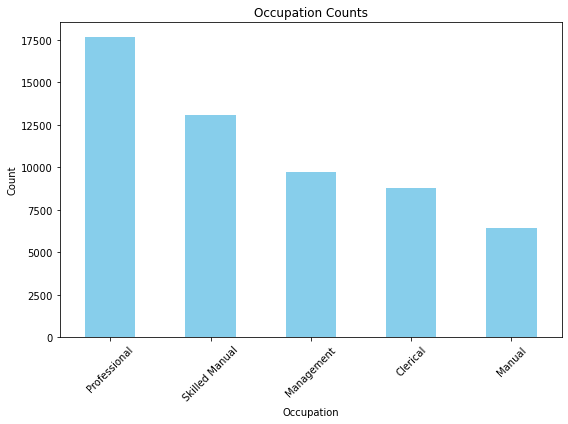

In [30]:
occupation_counts = df['Occupation'].value_counts()

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.title("Occupation Counts")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

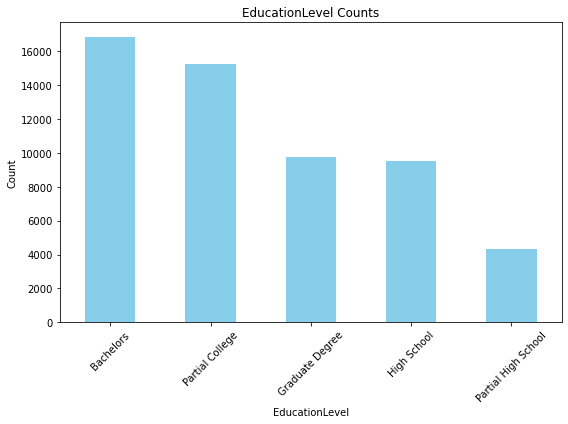

In [31]:
EducationLevel = df['EducationLevel'].value_counts()

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))
EducationLevel.plot(kind='bar', color='skyblue')
plt.title("EducationLevel Counts")
plt.xlabel("EducationLevel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

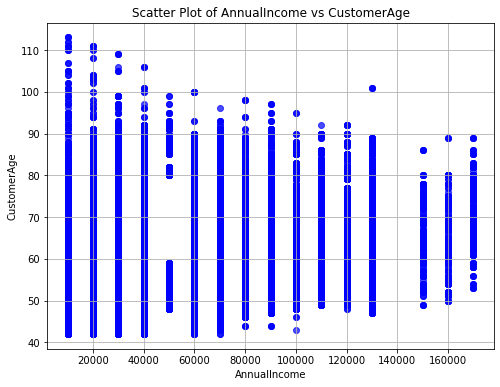

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['AnnualIncome'], df['CustomerAge'], color='blue', alpha=0.7)
plt.title("Scatter Plot of AnnualIncome vs CustomerAge")
plt.xlabel("AnnualIncome")
plt.ylabel("CustomerAge")
plt.grid(True)
plt.show()

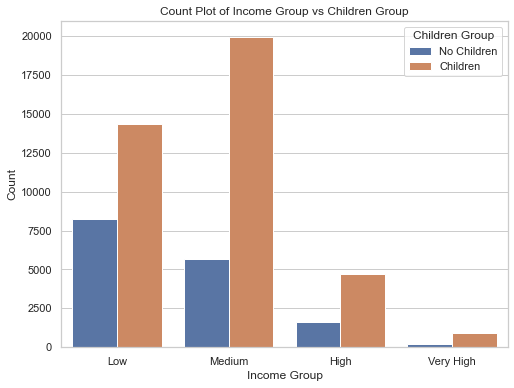

In [33]:
sns.set(style="whitegrid")

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income Group', hue='Children Group')
plt.title("Count Plot of Income Group vs Children Group")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()

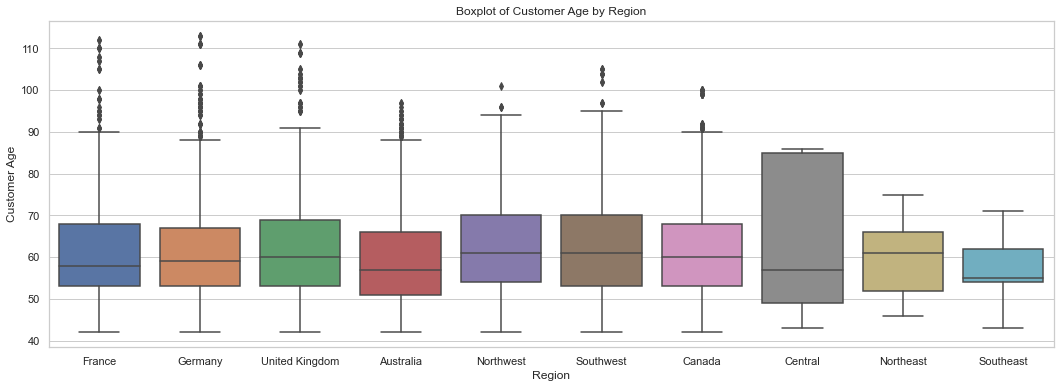

In [34]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x='Region', y='CustomerAge')
plt.title("Boxplot of Customer Age by Region")
plt.xlabel("Region")
plt.ylabel("Customer Age")
plt.show()